# The Sparks Foundation
## Data Science and Business Analytics Internship
## Task (6):  Decision Tree - Train and Visualize
### Prediction using Decision Tree Algorithm
## Objective:
### ●  Create the Decision Tree classifier and visualize it graphically.

### ● The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.


### Import Libraries

In [1]:
import pandas as pd
from six import StringIO

from sklearn.tree import DecisionTreeClassifier, export_graphviz

import pydotplus
import graphviz

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

### Read The Data

In [2]:

#load the csv file into a new pandas dataframe
iris_df = pd.read_csv('Iris.csv')
#Load the input variables into X
X = iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

#Load the output variable into y
y = iris_df['Species'].values
# Remove the header row
iris_df = iris_df.iloc[1:]

# Reset the index of the DataFrame
iris_df.reset_index(drop=True, inplace=True)


In [3]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,2,4.9,3.0,1.4,0.2,Iris-setosa
1,3,4.7,3.2,1.3,0.2,Iris-setosa
2,4,4.6,3.1,1.5,0.2,Iris-setosa
3,5,5.0,3.6,1.4,0.2,Iris-setosa
4,6,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
iris_df = iris_df.drop('Id', axis=1)


In [5]:
iris_df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  149 non-null    float64
 1   SepalWidthCm   149 non-null    float64
 2   PetalLengthCm  149 non-null    float64
 3   PetalWidthCm   149 non-null    float64
 4   Species        149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [7]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Model

In [8]:
#Create an instance of the decision tree classifier
dec_tree = DecisionTreeClassifier(criterion="entropy")

#Fit the model with the training data X_train and y_train
dec_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

### Visualize the Decision Tree.

In [10]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Users\\user\\Graphviz\\bin' 

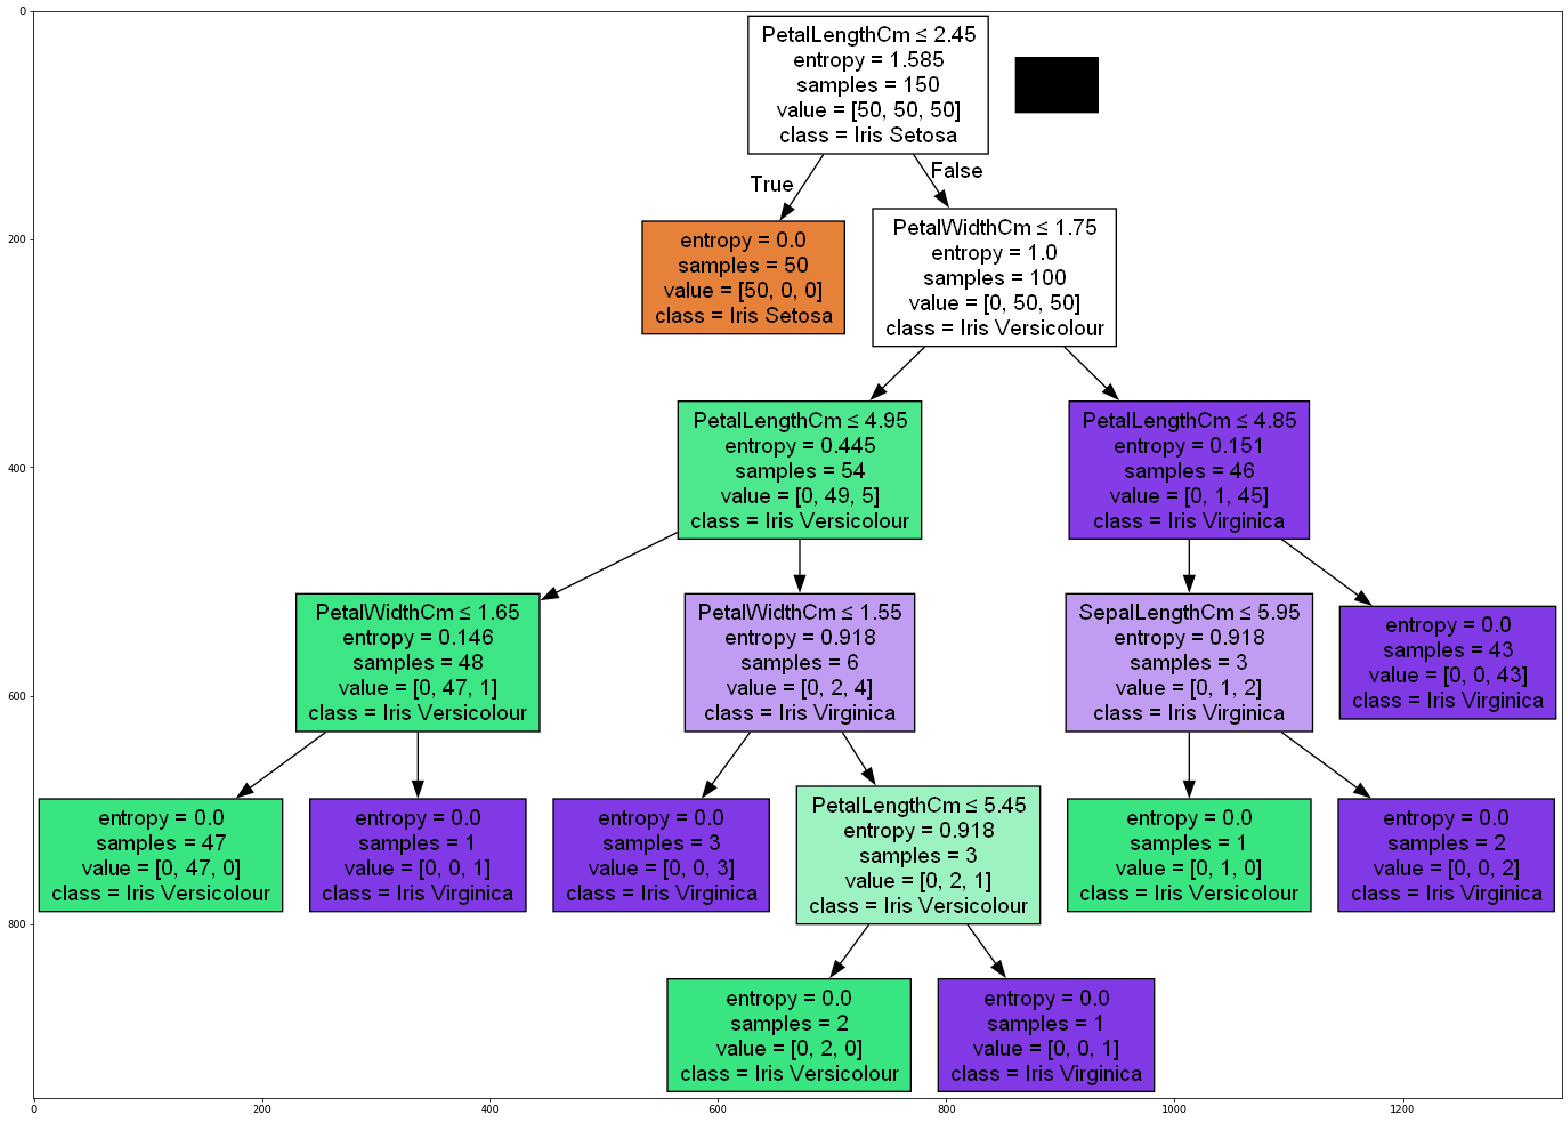

In [11]:
dot_data = StringIO()
filename = "iris_flower_tree.png"
feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
class_names = ['Iris Setosa', 'Iris Versicolour', 'Iris Virginica']
export_graphviz(dec_tree,
                feature_names=feature_names,
                out_file=dot_data,
                class_names=class_names,
                filled=True,
                special_characters=True,
                rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(30, 20))
plt.imshow(img, interpolation='nearest')